In [5]:
import pystan
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [33]:
mod = pystan.StanModel('regression.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5d0ccede5b5f5a4f9f09e9bf15bf45cf NOW.


In [34]:
data = pickle.load(open('regr.data.pickle','rb'))
print (data)

{'y': array([  47.01783542,   75.01024813,    4.70523347,   36.06123191,
         19.90568382,   14.99587066,   23.403693  ,   39.35531464,
         44.86330881,   59.29172505,   47.11775116,   73.64095869,
         24.77456269,   93.18930743,    7.86058059,   73.17623493,
         47.92939812,   61.05413926,   18.66340891,   24.1714185 ,
         85.49795122,  101.90349764,   35.99856414,   74.27585842,
         92.01891439,   95.15869838,   13.05729257,   10.12998603,
         22.3865336 ,   93.40782887,   13.73977154,   47.28014493,
        101.52950947,   57.3628279 ,   73.92149289,   36.58417765,
         72.27697545,   88.77772658,    7.67498838,   79.15491555,
        104.23665487,   78.50428203,   33.0057037 ,   82.31216049,
         16.44401837,   50.19825316,   95.83493335,   33.58625322,
         35.05128979,   19.96995896,    5.07871392,   74.11971732,
         27.79046235,   31.89267763,   52.9580479 ,   11.19959983,
         62.23084025,   19.06893686,   62.70049555,   75

In [35]:
res= mod.sampling(data, chains=5, sample_file='output.csv')

print (res)

Inference for Stan model: anon_model_5d0ccede5b5f5a4f9f09e9bf15bf45cf.
5 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=5000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha   5.23  4.1e-3   0.18   4.89   5.12   5.23   5.35   5.58   1884    1.0
beta    9.97  7.0e-4   0.03   9.91   9.95   9.97   9.99  10.03   1951    1.0
sigma   0.92  1.4e-3   0.07    0.8   0.87   0.91   0.96   1.06   2387    1.0
lp__  -41.18    0.03   1.28 -44.47 -41.77 -40.85 -40.23 -39.72   1655    1.0

Samples were drawn using NUTS at Mon Jun  5 23:04:58 2017.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


[  9.95758403   9.9370479    9.96356847 ...,   9.93175432  10.04601948
   9.92917316]


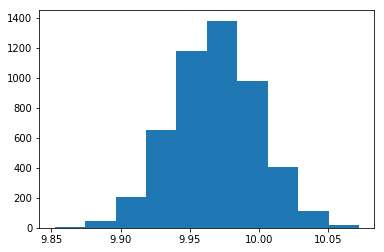

In [36]:
print (res.extract()['beta']);
plt.hist(res.extract()['beta']);

In [19]:
res= mod.optimizing(data, sample_file='output.csv')
print (res)

OrderedDict([('alpha', array(5.235840348853913)), ('beta', array(9.96863321171838)), ('sigma', array(0.8940097766234619))])


In [22]:
res= mod.sampling(data, iter=500,chains=5, sample_file='output.csv', init=[{'alpha':3, 'beta':4,'sigma':3}]*5, )



In [32]:
res= mod.sampling(data, chains=1, iter=1,sample_file='output.csv', init=[{'alpha':32, 'beta':4,'sigma':3}],algorithm='Fixed_param' )
print (res.extract())

OrderedDict([('alpha', array(32.0)), ('beta', array(4.0)), ('sigma', array(3.0000000000000004)), ('lp__', array(0.0))])
